# <div dir="rtl">سوال هشتم</div>

<div dir="rtl">



<div>


<div dir="rtl">

در این سلول ماژول‌های مورد نیاز را به نوت‌بوک اضافه می‌کنیم:

<div>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


<div dir="rtl">

در این قسمت دیتاست iris را لود می‌کنیم. سپس 80 درصد از دادگان را برای آموزش و 20 درصد از آن را برای تست جداسازی می‌کنیم:

<div>

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div dir="rtl">

حالا با استفاده از الگوریتم SVM خطی کلاسیفایرمان را آموزش می‌دهیم و با کمک داده‌های تست عملکرد آن را می‌سنجیم:

<div>

In [13]:
linsvc = LinearSVC()
linsvc.fit(X_train,y_train)
y_test_predict = linsvc.predict(X_test)
linsvc.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0


<div dir="rtl">

برای تحلیل عملکرد این مدل confusion matrix رانمایش می‌دهیم.

با توجه به اینکه صحت 100 درصد داشتیم مشاهده نیز می‌کنیم که تمام داده‌ها به درستی در کلاس خود قرار گرفته‌اند.
<div>

In [14]:
confusion_matrix(y_test, y_test_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])


<div dir="rtl">

در دو سلول زیر نیز هدفی مشابه سلول‌های قبلی داریم با این تفاوت که بجای استفاده از Linearsvc از SVC با کرنل linear استفاده کرده‌ایم.

همانطور که بصورت واضحی مشخص است نتایج مانند روش قبلی است و به صحت 100 درصد رسیده ایم.

<div>

In [17]:
linsvc2 = SVC(kernel = 'linear')
linsvc2.fit(X_train,y_train)
y_test_predict2 = linsvc2.predict(X_test)
linsvc2.score(X_test, y_test)

1.0

In [16]:
confusion_matrix(y_test, y_test_predict2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# <div dir="rtl"> قسمت b</div>

<div dir="rtl">

در این قسمت با استفاده از متود SVC و با کرنل Polynomail قصد داریم داده‌ها را دسته‌بندی کنیم.

برای اینکه بهترین پارامتر را پیدا کنیم پارامتر چند جمله ای را از 1 تا 10 تغییر میدهیم و صحت مراحل مختلف را در یک لیست ثبت می‌کنیم.

<div>

In [20]:
acc_list = []
for value in range(1, 11):
  polysvc = SVC(kernel = 'poly', degree=value)
  polysvc.fit(X_train,y_train)
  acc_list.append(polysvc.score(X_test, y_test))


<div dir="rtl">

حالا برای درک بهتر عملکرد این مدل به ازای پارامترهای گوناگون صحت مدل روی داده‌های تست را براساس پارامتر چندجمله ای رسم میکنیم.

همانطور که قابل مشاهده است میینیم که از تعداد 1 تا 7 با صحت 100 درصد داده ها کلاسبندی شده اند اما از پارامتر 8 به بعد بیش‌برازش اتفاق افتاده و عملکرد مدل تداوما بدتر از قبل شده است.

<div>

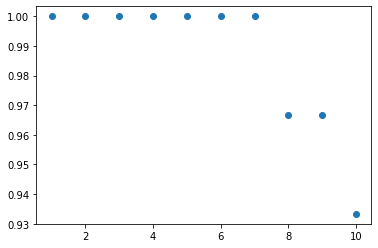

In [21]:
plt.scatter(np.arange(1,11),acc_list)

# <div dir="rtl"> قسمت b</div>

<div dir="rtl">

با بررسی قسمت قبل درمی‌یابیم که بهترین صحت به ازای پارامتر 1 تا 7 هست، بدلیل سادگی مجموعه داده مدلهای ساده نیز عملکرد خوبی دارند اما من پارامتر 7 را بعنوان پارامتر بهینه انتخاب میکنم.

<div>

In [22]:
polysvc = SVC(kernel = 'poly', degree=7)
polysvc.fit(X_train,y_train)
y_test_predict4 = polysvc.predict(X_test)
polysvc.score(X_test, y_test)

1.0


<div dir="rtl">

با این مدل به صحت 100 درصد می‌رسیم. اگر confusion matrix این مدل را بررسی کنیم درمی‌یابیم که همه ی نمونه ها به درستی سلاسبندی شده اند.

<div>

In [23]:
confusion_matrix(y_test, y_test_predict4)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])